# TODO
- make nice plot

In [ ]:
import numpy as np
from nibabel.freesurfer.io import write_geometry
from fmri_tools.surface.mesh import Mesh
from fmri_tools.surface.filter import LaplacianGaussian
import os
import sys
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.sphere import Sphere
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

In [4]:
# parameters
SCALE = 7
SUBDIV = 5
T_VEC = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0]
N_ITER = 10

# estimate mean filter cycle for different gaussian scales
period = np.zeros((N_ITER, len(T_VEC)))
for i in range(N_ITER):
    for j, t  in enumerate(T_VEC):
        sphere = Sphere(scale=SCALE)
        sphere.subdivide(SUBDIV)

        filter = LaplacianGaussian(sphere.vtx, sphere.fac, t)
        res = filter.spatial_scale(n_iter=1)
        period[i, j] = res["period"]  # in mm

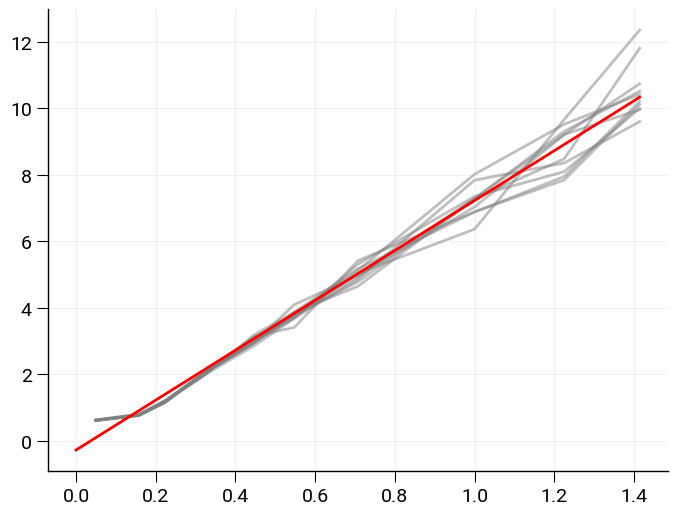

In [6]:
for i in range(N_ITER):
    plt.plot(np.sqrt(T_VEC), period[i, :], "gray", alpha=0.5)


x, y = np.sqrt(T_VEC), np.mean(period, axis=0)
m, b = np.polyfit(x, y, 1)
x_fit = np.linspace(0, x[-1], 100)
y_fit = m * x_fit + b
plt.plot(x_fit, y_fit, color="red")

In [27]:
T_VEC_USE = [0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0]

for t in T_VEC_USE:
    period = m * np.sqrt(t) + b
    print(f"t: {t}; period: {period}")

t: 0.025; period: 0.9078806826020066
t: 0.05; period: 1.3994037144651057
t: 0.075; period: 1.776562602026904
t: 0.1; period: 2.094522252344644
t: 0.2; period: 3.0775683160708422
t: 0.3; period: 3.831886091194439
t: 0.4; period: 4.467805391829919
t: 0.5; period: 5.028061542602559
t: 1.0; period: 7.226219366107929
t: 2.0; period: 10.334883972345748
